In [2]:
from typing import List
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib import animation

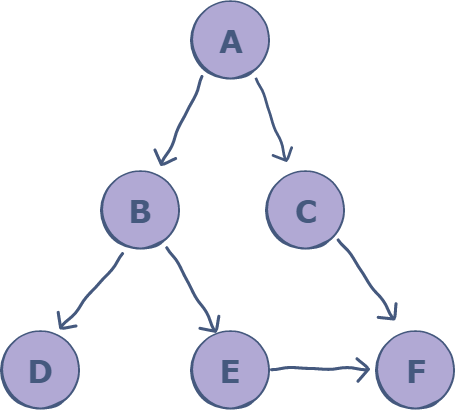

## DFS - Depth-First-Search

In [3]:
graph = {
    'A' : ['B','C'],
    'B' : ['D', 'E'],
    'C' : ['F'],
    'D' : [],
    'E' : ['F'],
    'F' : []
}

visited = set() # Set to keep track of visited nodes.

def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
dfs(visited, graph, 'A')

A
B
D
E
F
C


## BFS - Breadth-First-Search

In [4]:
visited = [] # List to keep track of visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0) 
    print (s, end = " ") 

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

# Driver Code
bfs(visited, graph, 'A')

A B C D E F 

# Uniformed Search

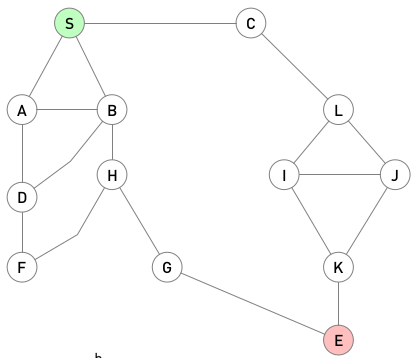

We do not have a measure to tell us what expanded node is best to follow, this is the sense in which we have
no information. And this is why we systematise search so that we can explore all possible paths iteratively.

There is a very important interplay between r and e in keeping q updated with the paths the algorithm has not
explored yet.

In [5]:
g = {
    's': {'a', 'b', 'c'},
    'a': {'b', 'd', 's'},
    'b': {'d', 'h', 's'},
    'c': {'l', 's'},
    'd': {'a', 'b', 'f'},
    'e': {'g', 'k'},
    'f': {'d', 'h'},
    'g': {'e', 'h'},
    'h': {'b', 'f', 'g'},
    'i': {'j', 'k', 'l'},
    'j': {'i', 'k', 'l'},
    'k': {'e', 'i', 'j'},
    'l': {'c', 'i', 'j'},
}

In [6]:
def build_graph(graph, start, goal, visited):
    G = nx.Graph()
    for node in graph:
        for child in graph[node[0]]:
            G.add_edge(node, child)
            
    color_map = []
    for node in G.nodes():
        if node == start:
            color_map.append('lightGreen')
        elif node == goal:
            color_map.append('red')
        elif node in visited:
            color_map.append('gray')
        else:
            color_map.append('gray')
            
    nx.draw(G, with_labels=True, node_color=color_map)

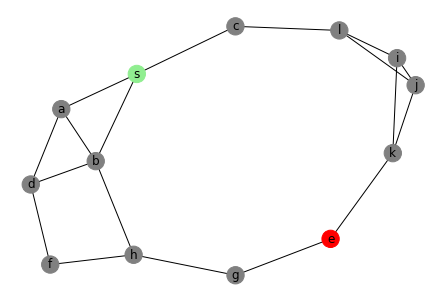

In [7]:
build_graph(g, 's', 'e', {})

# British Museum Algorithm

In [8]:
def bm(graph, start, goal):
    q = [(start, [start])]
    i = 0
    while q:
        (vertex, path) = q.pop(0)
        for next in graph[vertex] - set(path):
            i += 1
            if next == goal:
                print("Total iterations: ", i)
                print("Path: ", path + [next] )
                return
            else:
                q.append((next, path + [next]))

In [9]:
bm(g, 's', 'e')

Total iterations:  21
Path:  ['s', 'b', 'h', 'g', 'e']


## DFS - Depth-First-Search

In [10]:
def dfs_path(graph, start, goal):
    q = [(start, [start])] # start = nó inicial ; [start] = path até ao nó atual
    i = 0
    while q:
        i += 1
        h = q[0] #primeiro separo a q em cabeça e resto
        r = q[1:]
        if h[0] == goal: #pergunto se a cabeça é o nó objetivo
            print("Total iterations: ", i)
            print("Path: ", h[1])
            return # se é, acabou o programa
        else:
            e_filter = [] #expansão dos nós do  no atual
            for node in graph[h[0]]:
                if node not in h[1]: #verificamos se h[0] já está no path percorrido atual
                    e_filter.append(node)
            e = [(e_final, h[1] + [e_final]) for e_final in e_filter]
            q = sorted(e) + r

In [11]:
dfs_path(g, 's', 'e')

Total iterations:  8
Path:  ['s', 'a', 'b', 'd', 'f', 'h', 'g', 'e']


## BFS - Breadth-First-Search

In [12]:
def bfs_path(graph, start, goal):
    q = [(start, [start])]
    i = 0
    while q:
        i += 1
        h = q[0]
        r = q[1:]
        if h[0] == goal:
            print("Total iterations: ", i)
            print("Path: ", h[1])
            return
        else:
            e_filter = []
            for node in graph[h[0]]:
                if node not in h[1]:
                    e_filter.append(node)
            e = [(e_final, h[1] + [e_final]) for e_final in e_filter]
            q = r + sorted(e)

In [13]:
bfs_path(g, 's', 'e')

Total iterations:  27
Path:  ['s', 'b', 'h', 'g', 'e']


# Differences Between BFS & DFS

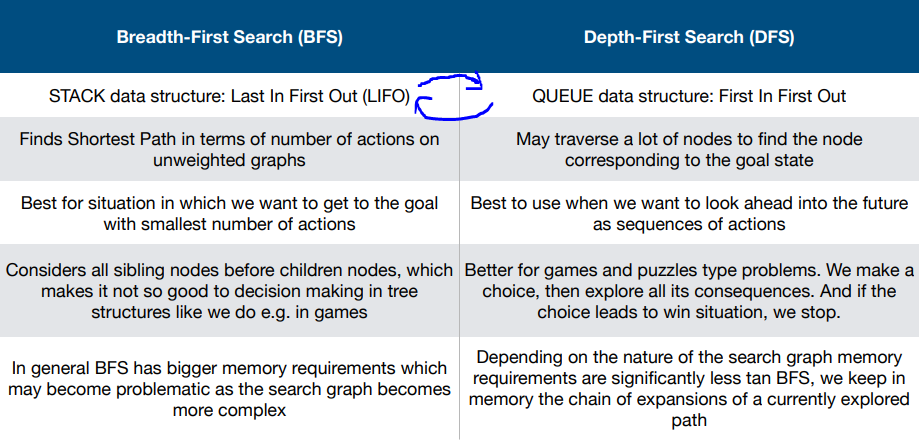

# Solução Prof

In [14]:
g = { 
    's': {'a','b','c'},
    'a': {'b','d','s'},
    'b': {'d','h','s'},
    'c': {'l','s'},
    'd': {'a','b', 'f'},
    'e': {'g','k'},
    'f': {'d','h'},
    'g': {'e','h'},
    'h': {'b','f', 'g'},
    'i': {'j','k', 'l'},
    'j': {'i','k', 'l'},
    'k': {'e','i', 'j'},
    'l': {'c','i', 'j'},
}

# B

In [15]:
def uninformed_search_b(graph, start, goal, option):
    q = [(start, [start])]
    # option 0: DFS
    # option 1: BFS
    enq = 1 # esta variavel é útil so para imprimir o tamanho da queue, não tem efeito no algoritmo
    i=0 # vamos manter um contador da iteração na qual estamos 
    while q:
        i+=1
        print('current q has ', q)
        h = q[0] #primeiro separo a q em cabeça e resto
        r = q[1:]
        print('iteration', i)
        print('q size starts', enq)
        if h[0] == goal: #pergunto se a cabeça é o nó objetivo
            print('found goal') # se é, acabou o programa
            break
        else:
            enq = enq - 1 # reduzimos a queue em um elemento porque a cabeça já era
            e_filter = [] # e faço a expansão do h, mas não considerando qualquer nó filho que já tenha sido visitado
            for node in graph[h[0]]: # para cada nó que é filho da cabeça atual (h)
                if node not in h[1]: # se o nó não estiver no caminho que conhecemos até agora para o h[0]
                    e_filter.append(node)
                    enq += 1 # cada nó filho vai produzir un novo tuplo a incluir na queue
            if option == 0: # DFS
                e = [(e_final, h[1] + [e_final]) for e_final in e_filter]
                q =  sorted(e) + r
                print('q size end it', len(q))
            else: #BFS
                e = [(e_final, h[1] + [e_final]) for e_final in e_filter] 
                q = r + sorted(e)
                
                print('q size end it', len(q))
        print('- - - - ')

In [16]:
uninformed_search_b(g,'s','e',0)

current q has  [('s', ['s'])]
iteration 1
q size starts 1
q size end it 3
- - - - 
current q has  [('a', ['s', 'a']), ('b', ['s', 'b']), ('c', ['s', 'c'])]
iteration 2
q size starts 3
q size end it 4
- - - - 
current q has  [('b', ['s', 'a', 'b']), ('d', ['s', 'a', 'd']), ('b', ['s', 'b']), ('c', ['s', 'c'])]
iteration 3
q size starts 4
q size end it 5
- - - - 
current q has  [('d', ['s', 'a', 'b', 'd']), ('h', ['s', 'a', 'b', 'h']), ('d', ['s', 'a', 'd']), ('b', ['s', 'b']), ('c', ['s', 'c'])]
iteration 4
q size starts 5
q size end it 5
- - - - 
current q has  [('f', ['s', 'a', 'b', 'd', 'f']), ('h', ['s', 'a', 'b', 'h']), ('d', ['s', 'a', 'd']), ('b', ['s', 'b']), ('c', ['s', 'c'])]
iteration 5
q size starts 5
q size end it 5
- - - - 
current q has  [('h', ['s', 'a', 'b', 'd', 'f', 'h']), ('h', ['s', 'a', 'b', 'h']), ('d', ['s', 'a', 'd']), ('b', ['s', 'b']), ('c', ['s', 'c'])]
iteration 6
q size starts 5
q size end it 5
- - - - 
current q has  [('g', ['s', 'a', 'b', 'd', 'f', 'h', '

In [17]:
uninformed_search_b(g,'s','e',1)

current q has  [('s', ['s'])]
iteration 1
q size starts 1
q size end it 3
- - - - 
current q has  [('a', ['s', 'a']), ('b', ['s', 'b']), ('c', ['s', 'c'])]
iteration 2
q size starts 3
q size end it 4
- - - - 
current q has  [('b', ['s', 'b']), ('c', ['s', 'c']), ('b', ['s', 'a', 'b']), ('d', ['s', 'a', 'd'])]
iteration 3
q size starts 4
q size end it 5
- - - - 
current q has  [('c', ['s', 'c']), ('b', ['s', 'a', 'b']), ('d', ['s', 'a', 'd']), ('d', ['s', 'b', 'd']), ('h', ['s', 'b', 'h'])]
iteration 4
q size starts 5
q size end it 5
- - - - 
current q has  [('b', ['s', 'a', 'b']), ('d', ['s', 'a', 'd']), ('d', ['s', 'b', 'd']), ('h', ['s', 'b', 'h']), ('l', ['s', 'c', 'l'])]
iteration 5
q size starts 5
q size end it 6
- - - - 
current q has  [('d', ['s', 'a', 'd']), ('d', ['s', 'b', 'd']), ('h', ['s', 'b', 'h']), ('l', ['s', 'c', 'l']), ('d', ['s', 'a', 'b', 'd']), ('h', ['s', 'a', 'b', 'h'])]
iteration 6
q size starts 6
q size end it 7
- - - - 
current q has  [('d', ['s', 'b', 'd']), 

# C

In [18]:
def uninformed_search_c(search_graph, start, goal, option):
    q = [(start, [start])]
    v = []
    # option 0: DFS
    # option 1: BFS
    enq = 1
    i=0 # vamos manter um contador da iteração na qual estamos 
    while q:
        i+=1
        #print('current q has ', q)
        h = q[0] #primeiro separo a q em cabeça e resto
        r = q[1:]
        #print('iteration', i)
        #print('q size starts', enq)
        if h[0] == goal: #pergunto se a cabeça é o nó objetivo
            print('found') # se é, acabou o programa
            break
        else:
            enq = enq - 1
            v.append(h[0]) # se não é, marco o h como "visitado"
            e_filter = [] # e faço a expansão do h, mas não considerando qualquer nó filho que já tenha sido visitado
            for node in search_graph[h[0]]:
                if node not in v:
                    e_filter.append(node)
                    enq += 1
            if option == 0: # DFS
                e = [(e_final, h[1] + [e_final]) for e_final in e_filter]
                q =  sorted(e) + r
                #print('q size end it', len(q))
            else: #BFS
                e = [(e_final, h[1] + [e_final]) for e_final in e_filter]
                q = r + sorted(e)   
                #print('q size end it', len(q))
        #print('- - - - ')


In [19]:
uninformed_search_c(g,'s','e',0)

found


In [20]:
uninformed_search_c(g,'s','e',1)

found
